# Języki skryptowe w analizie danych - biblioteka matplotlib
###### dr inż. Marcin Lawnik

### Wytyczne:
<ol>
<li>  Napisz procedurę, która wyświetli wykres funkcji sinus i cosinus z modyfikacją osi, podpisami, legendą itp. </li>
<li>Napisz procedurę, która wyświetli losową ilość (pozycja i rodzaj) figur geometrycznych.</li>
<li> Napisz procedurę, która wyświetli subploty z wartościami funkcji $f(x) =  \{x, x^2, x^3, x^4 \}$.</li>
<li>  Zbiór Mandelbrota 
    <ul>
        <li>Napisz procedurę, która pozwoli na wygenerowanie zbioru Mandelbrota. </li>

   Zbiór Mandelbrota $M$ tworzą punkty $p \in \mathbb{C}$, dla których ciąg $z_n$ opisany zależnością rekurencyjna nie dąży do $\infty$:
        $$
        \left \{
        \begin{matrix}
        z_0 = p \\
        z_{n+1} = z_n^2 + p
        \end{matrix}
        \right.
        $$

   Powyższe zależności można zapisać w postaci:
        $$
        M = \{ z \in \mathbb{C}: \forall n\in \mathbb{N} \mid z_n \mid < 2\}
        $$

   <li> Użyj różnych "efektów graficznych" oferowanych przez <mark>pyplot.scatterplot()</mark>. </li>
        <li> Napisaną procedurą przetestuj inne odwzorowania zespolone. Wykorzystaj w tym m.in. sprzężenia i wielomiany wyższych rzędów. </li>
        </li>
    </ul>
</ol>

**Uwaga**
Na Platformę Zdalnej Edukacji wysyłamy rozwiązania co najmniej 2 zadań w postaci pliku *ipynb* i *html*.

# 1

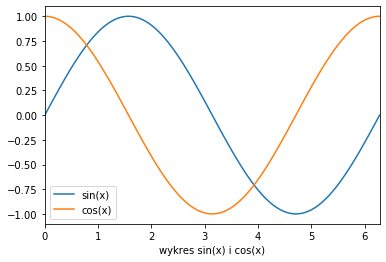

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2*np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1)
plt.xlim(0,2*np.pi)

plt.plot(x, y2)
plt.xlabel("wykres sin(x) i cos(x)")
plt.xlim(0,2*np.pi)

plt.legend(["sin(x)", "cos(x)"])
plt.show()

# 2

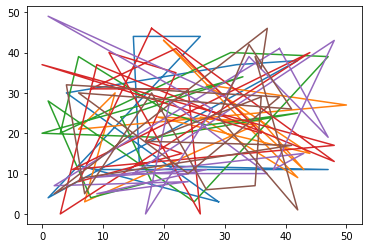

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

for i in range(random.randint(1, 10)):
    size = range(random.randint(10, 20))
    x = [random.randint(0, 50) for x in size]
    x = x + [x[0]]
    y = [random.randint(0, 50) for y in size]
    y = y + [y[0]]
    plt.plot(x, y)
plt.show()

# 3

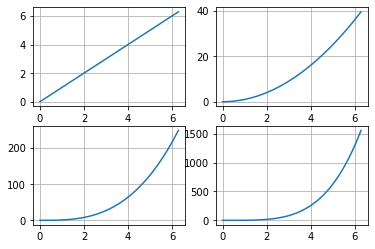

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2*np.pi,100)
y1 = x
y2 = x**2
y3 = x**3
y4 = x**4

plt.subplot(2,2,1)
plt.plot(x, y1)
plt.grid()

plt.subplot(2,2,2)
plt.plot(x, y2)
plt.grid()

plt.subplot(2,2,3)
plt.plot(x, y3)
plt.grid()

plt.subplot(2,2,4)
plt.plot(x, y4)
plt.grid()

plt.show()

# 4

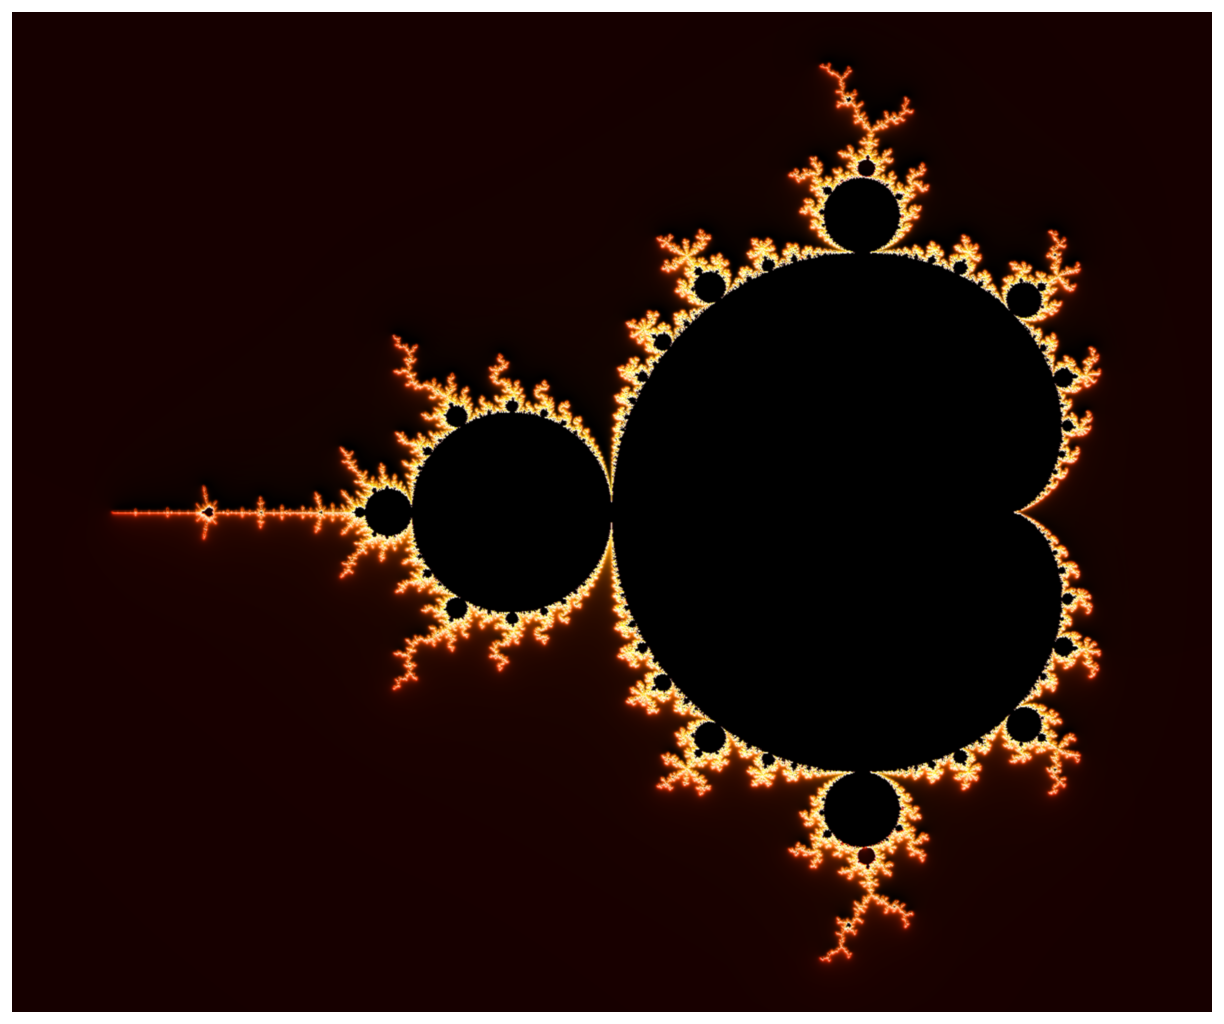

In [7]:
import time
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, int(xn), dtype=np.float32)
    Y = np.linspace(ymin, ymax, int(yn), dtype=np.float32)
    C = X + Y[:, None]*1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N

xmin, xmax, xn = -2.25, +0.75, 3000/2
ymin, ymax, yn = -1.25, +1.25, 2500/2
maxiter = 200
horizon = 2.0 ** 40
log_horizon = np.log(np.log(horizon))/np.log(2)
Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

with np.errstate(invalid='ignore'):
    M = np.nan_to_num(N + 1 -
                      np.log(np.log(abs(Z)))/np.log(2) +
                      log_horizon)

dpi = 120
width = 10
height = 10*yn/xn
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

light = colors.LightSource(azdeg=10, altdeg=250)
M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                norm=colors.PowerNorm(0.3), blend_mode='hsv')
plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
ax.set_xticks([])
ax.set_yticks([])

plt.show()
# https://matplotlib.org/3.2.1/gallery/showcase/mandelbrot.html :(